In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy

# Grab Data

In [2]:
# Load ERA5 and OISST Data (through 2023)
wind = xr.load_dataset("data/10wind.monthly.mean.1979-2023.na.nc")
sst = xr.load_dataset("data/sst.day.mean.1982-2024.na.nc")

In [3]:
wind

<xarray.Dataset> Size: 2GB
Dimensions:  (time: 540, lat: 361, lon: 721)
Coordinates:
  * lat      (lat) float32 1kB -10.0 -9.75 -9.5 -9.25 ... 79.25 79.5 79.75 80.0
  * time     (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2023-12-01
  * lon      (lon) float32 3kB -120.0 -119.8 -119.5 -119.2 ... 59.5 59.75 60.0
Data variables:
    u10      (time, lat, lon) float64 1GB -6.409 -6.412 ... -0.927 -0.9795
    v10      (time, lat, lon) float64 1GB -0.6744 -0.6206 ... 0.3966 0.3643
Attributes:
    Conventions:  CF-1.6
    history:      2022-12-01 19:09:52 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

# Plotting

In [4]:
# Calculate winds anomalies
wind_clim = wind.sel(time=slice("1991", "2020")).groupby("time.month").mean("time")
wind_anom = wind.groupby("time.month") - wind_clim

In [14]:
# Calculate SST anomalies 

# Data is daily, so must be converted to monthly means
sst = sst.resample(time="1MS").mean("time")
sst_clim = sst.sel(time=slice("1991", "2020")).groupby("time.month").mean("time")
sst_anom = sst.groupby("time.month") - sst_clim

Plot average anomalies for three three-year periods (2012-2015, 2016-2019, 2020-2023). These periods correspond to different regions of interest on a depth v time plot of temperautre anomalies in the East box (see ssh_and_heat.ipynb; week 5 plots in Drive). 

<>:16: SyntaxWarning: invalid escape sequence '\c'
<>:16: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_86041/1464596946.py:16: SyntaxWarning: invalid escape sequence '\c'
  cbar.ax.set_ylabel("SST Anomaly ($^\circ$ C)")


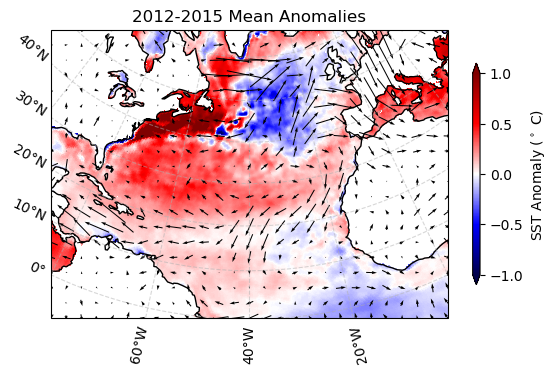

In [50]:
# Grab and plot average SST and Wind anomalies for 2012-2015
mixed_past = wind_anom.sel(time=slice("2012", "2015")).mean("time")
sst_mean_past = sst_anom.sel(time=slice("2012", "2015")).mean("time")

central_lon = -40
central_lat = 30
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.LambertConformal(central_lon, central_lat)})
ax.coastlines()
ax.add_feature(cartopy.feature.LAKES, edgecolor='black', facecolor="none")
ax.set_extent([-80, 0, 0, 60])
gl = ax.gridlines(alpha = 0.5, draw_labels=True, linestyle = "--", x_inline=False, y_inline=False)
gl.right_labels = False
gl.top_labels = False
temp = sst_mean_past.sst.plot(ax=ax, cmap= "seismic", transform = ccrs.PlateCarree(), vmin=-1, vmax=1, add_colorbar=False)
mixed_past.plot.quiver(ax=ax, x="lon", y="lat", u="u10", v="v10", transform=ccrs.PlateCarree(), regrid_shape = 20,add_guide=False) # regrid_shape gives the wind vectors a nice size and spacing
cbar = fig.colorbar(temp, ax = ax, orientation="vertical", extend="both", aspect=30, shrink=0.6)
cbar.ax.set_ylabel("SST Anomaly ($^\circ$ C)")
ax.set_title("2012-2015 Mean Anomalies")
fig.savefig("figures/Week_5/2012-2015_sst_wind.png", dpi=300)

<>:16: SyntaxWarning: invalid escape sequence '\c'
<>:16: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_86041/1423367375.py:16: SyntaxWarning: invalid escape sequence '\c'
  cbar.ax.set_ylabel("SST Anomaly ($^\circ$ C)")


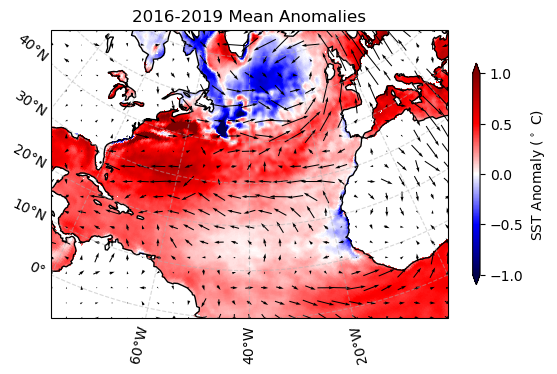

In [51]:
# Grab and plot average SST and Wind anomalies for 2016-2019
mixed = wind_anom.sel(time=slice("2016", "2019")).mean("time")
sst_mean = sst_anom.sel(time=slice("2016", "2019")).mean("time")

central_lon = -40
central_lat = 30
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.LambertConformal(central_lon, central_lat)})
ax.coastlines()
ax.add_feature(cartopy.feature.LAKES, edgecolor='black', facecolor="none")
ax.set_extent([-80, 0, 0, 60])
gl = ax.gridlines(alpha = 0.5, draw_labels=True, linestyle = "--", x_inline=False, y_inline=False)
gl.right_labels = False
gl.top_labels = False
temp = sst_mean.sst.plot(ax=ax, cmap= "seismic", transform = ccrs.PlateCarree(), vmin=-1, vmax=1, add_colorbar=False)
mixed.plot.quiver(ax=ax, x="lon", y="lat", u="u10", v="v10", transform=ccrs.PlateCarree(), regrid_shape = 20,add_guide=False) # regrid_shape gives the wind vectors a nice size and spacing
cbar = fig.colorbar(temp, ax = ax, orientation="vertical", extend="both", aspect=30, shrink=0.6)
cbar.ax.set_ylabel("SST Anomaly ($^\circ$ C)")
ax.set_title("2016-2019 Mean Anomalies")
fig.savefig("figures/Week_5/2016-2019_sst_wind.png", dpi=300)

<>:16: SyntaxWarning: invalid escape sequence '\c'
<>:16: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_86041/708219853.py:16: SyntaxWarning: invalid escape sequence '\c'
  cbar.ax.set_ylabel("SST Anomaly ($^\circ$ C)")


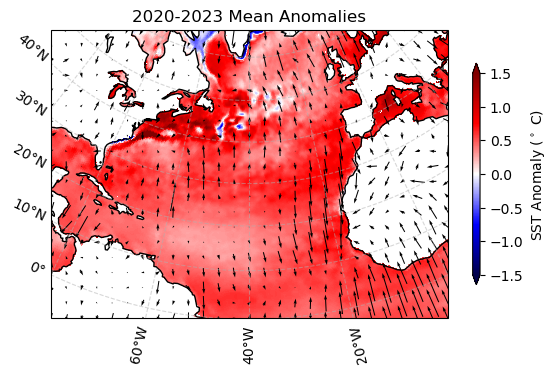

In [52]:
# Grab and plot average SST and Wind anomalies for 2016-2019
mixed_now = wind_anom.sel(time=slice("2020", "2023")).mean("time")
sst_mean_now = sst_anom.sel(time=slice("2020", "2023")).mean("time")

central_lon = -40
central_lat = 30
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.LambertConformal(central_lon, central_lat)})
ax.coastlines()
ax.add_feature(cartopy.feature.LAKES, edgecolor='black', facecolor="none")
ax.set_extent([-80, 0, 0, 60])
gl = ax.gridlines(alpha = 0.5, draw_labels=True, linestyle = "--", x_inline=False, y_inline=False)
gl.right_labels = False
gl.top_labels = False
temp = sst_mean_now.sst.plot(ax=ax, cmap= "seismic", transform = ccrs.PlateCarree(), vmin=-1.5, vmax=1.5, add_colorbar=False)
mixed_now.plot.quiver(ax=ax, x="lon", y="lat", u="u10", v="v10", transform=ccrs.PlateCarree(), regrid_shape = 20,add_guide=False) # regrid_shape gives the wind vectors a nice size and spacing
cbar = fig.colorbar(temp, ax = ax, orientation="vertical", extend="both", aspect=30, shrink=0.6)
cbar.ax.set_ylabel("SST Anomaly ($^\circ$ C)")
ax.set_title("2020-2023 Mean Anomalies")
fig.savefig("figures/Week_5/2023-2023_sst_wind.png", dpi=300)

Playing around with differences between means for different periods... may not be super useful as of right now.

<>:19: SyntaxWarning: invalid escape sequence '\c'
<>:19: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_86041/3441192425.py:19: SyntaxWarning: invalid escape sequence '\c'
  cbar.ax.set_ylabel("SST Anomaly ($^\circ$ C)")


Text(0.5, 1.0, '2020-2023 minus 2000-2003 Mean Anomalies')

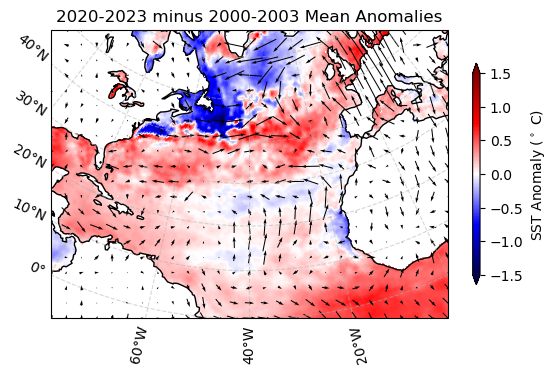

In [57]:
mixed_ref = wind_anom.sel(time=slice("2000", "2003")).mean("time")
sst_mean_ref = sst_anom.sel(time=slice("2000", "2003")).mean("time")

diff_mixed = mixed - mixed_past
diff_sst_mean = sst_mean - sst_mean_past

central_lon = -40
central_lat = 30
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.LambertConformal(central_lon, central_lat)})
ax.coastlines()
ax.add_feature(cartopy.feature.LAKES, edgecolor='black', facecolor="none")
ax.set_extent([-80, 0, 0, 60])
gl = ax.gridlines(alpha = 0.5, draw_labels=True, linestyle = "--", x_inline=False, y_inline=False)
gl.right_labels = False
gl.top_labels = False
temp = diff_sst_mean.sst.plot(ax=ax, cmap= "seismic", transform = ccrs.PlateCarree(), vmin=-1.5, vmax=1.5, add_colorbar=False)
diff_mixed.plot.quiver(ax=ax, x="lon", y="lat", u="u10", v="v10", transform=ccrs.PlateCarree(), regrid_shape = 20,add_guide=False)
cbar = fig.colorbar(temp, ax = ax, orientation="vertical", extend="both", aspect=30, shrink=0.6)
cbar.ax.set_ylabel("SST Anomaly ($^\circ$ C)")
ax.set_title("2020-2023 minus 2000-2003 Mean Anomalies")